<a href="https://colab.research.google.com/github/ludawg44/jigsawlabs/blob/master/8_styling_matplotlib_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Styling Matplotlib

### Introduction

In this lesson, let's work to style some of our previous plots.  

### Loading our Data

Let's start by loading up the necessary libraries.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline


And then loading our data.

In [0]:
url = "https://raw.githubusercontent.com/jigsawlabs-student/matplotlib/master/spotify.csv?token=AADXLBP3J2PZI3ZLTIZ45NK6QNGHO"
df = pd.read_csv(url, encoding = "ISO-8859-1", index_col = 0)
songs = df.to_numpy()

In [0]:
songs[:2]

array([['Hey, Soul Sister', 'Train', 'neo mellow', 2010, 97, 89, 67, -4,
        8, 80, 217, 19, 4, 83],
       ['Love The Way You Lie', 'Eminem', 'detroit hip hop', 2010, 87,
        93, 75, -5, 52, 64, 263, 24, 23, 82]], dtype=object)

In [0]:
df.columns

Index(['title', 'artist', 'top genre', 'year', 'bpm', 'nrgy', 'dnce', 'dB',
       'live', 'val', 'dur', 'acous', 'spch', 'pop'],
      dtype='object')

### Seeing the Scope of the Data

In [0]:
df.head()

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


Now previously, we found counts of our categories with something like the following.

In [0]:
genres = songs[:, 2]

In [0]:
genre_counts = np.unique(genres, return_counts = True)
genre_names = genre_counts[0]
genre_nums = genre_counts[1]

genre_counts_grid = np.stack([genre_names, genre_nums], axis = 1)

In [0]:
top_eight = genre_counts_grid[np.argsort(genre_counts_grid[:, 1])[::-1]][:11]
top_eight

array([['dance pop', 327],
       ['pop', 60],
       ['canadian pop', 34],
       ['barbadian pop', 15],
       ['boy band', 15],
       ['electropop', 13],
       ['british soul', 11],
       ['big room', 10],
       ['canadian contemporary r&b', 9],
       ['neo mellow', 9],
       ['art pop', 8]], dtype=object)

Now, once again, let's create our plot of the categories.  Again, use a horizontal bar plot (the bars are stacked top to bottom) of the top categories and the related counts.

> This time, also add a title to the plot, called `Counts of Genres`, and an x axis title called `counts`.

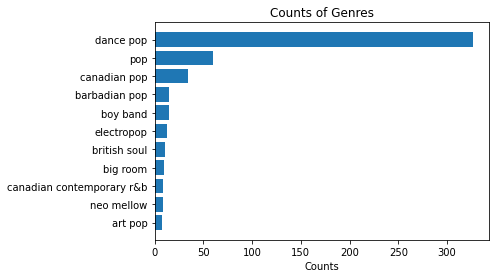

In [0]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.barh(top_eight[:,0][::-1], top_eight[:,1][::-1])
ax.set_title('Counts of Genres')
ax.set_xlabel('Counts')
plt.show()

> Answer: <img src="https://github.com/jigsawlabs-student/matplotlib/blob/master/genre-counts.png?raw=1" width="50%">

### Distinguishing dance from non-dance

> Once again, here are our columns.

In [0]:
df.columns

Index(['title', 'artist', 'top genre', 'year', 'bpm', 'nrgy', 'dnce', 'dB',
       'live', 'val', 'dur', 'acous', 'spch', 'pop'],
      dtype='object')

Next, let's collect our `dance_pop_songs` and `non_dance_pop_songs`.

In [0]:
non_dance_pop_songs = songs[~(songs[:, 2] == 'dance pop')]
dance_pop_songs = songs[(songs[:, 2] == 'dance pop')]

Ok, now let's plot the histograms of danciness for each, and have 100 bins for the histograms.  Make sure to have a legend that indicates which histogram represents the `dance_pop_songs` and which represents the `non_dance_pop_songs`.

none


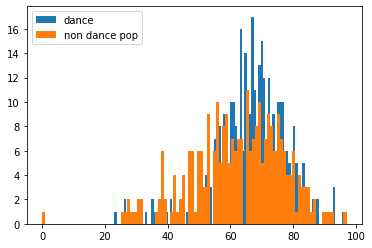

In [0]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(dance_pop_songs[:, 6], bins = 100, label = 'dance')
ax.hist(non_dance_pop_songs[:, 6], bins = 100, label = 'non dance pop')
ax.legend()
print('none')

> Answer: <img src="https://github.com/jigsawlabs-student/matplotlib/blob/master/dance-v-non.png?raw=1" width="40%">

### Relationships between Variables

In [0]:
df.columns

Index(['title', 'artist', 'top genre', 'year', 'bpm', 'nrgy', 'dnce', 'dB',
       'live', 'val', 'dur', 'acous', 'spch', 'pop'],
      dtype='object')

Let's plot `bpm` and `duration` for songs, and have the style of light blue circles.  Set the range on the x axis between 50 and 200.

In [0]:
df.head()

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


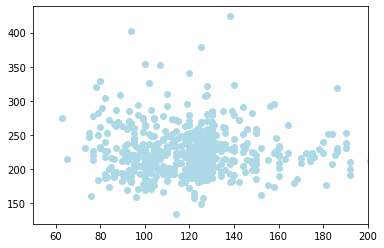

In [0]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(songs[:,4], songs[:,-4], c='lightblue')
ax.set_xlim(50, 200)
plt.show()

> Answer: <img src="https://github.com/jigsawlabs-student/matplotlib/blob/master/pretty-scatter.png?raw=1" width="40%">

Here, there does not appear to be a strong relation.

### Differences in Pop

Now let's take a look at the different kinds of pop that we have.  First, use *Numpy* and *Python* to select all of the genres that have the word `pop` in them.

In [0]:
np.unique(songs[:,2])

array(['acoustic pop', 'alaska indie', 'alternative r&b', 'art pop',
       'atl hip hop', 'australian dance', 'australian hip hop',
       'australian pop', 'barbadian pop', 'baroque pop', 'belgian edm',
       'big room', 'boy band', 'british soul', 'brostep',
       'canadian contemporary r&b', 'canadian hip hop', 'canadian latin',
       'canadian pop', 'candy pop', 'celtic rock', 'chicago rap',
       'colombian pop', 'complextro', 'contemporary country', 'dance pop',
       'danish pop', 'detroit hip hop', 'downtempo', 'edm', 'electro',
       'electro house', 'electronic trap', 'electropop', 'escape room',
       'folk-pop', 'french indie pop', 'hip hop', 'hip pop', 'hollywood',
       'house', 'indie pop', 'irish singer-songwriter', 'latin',
       'metropopolis', 'moroccan pop', 'neo mellow', 'permanent wave',
       'pop', 'tropical house'], dtype=object)

In [0]:
pop = []
for genre in np.unique(songs[:,2]):
  if 'pop' in genre:
    pop.append(genre)

In [0]:
pop

['acoustic pop',
 'art pop',
 'australian pop',
 'barbadian pop',
 'baroque pop',
 'canadian pop',
 'candy pop',
 'colombian pop',
 'dance pop',
 'danish pop',
 'electropop',
 'folk-pop',
 'french indie pop',
 'hip pop',
 'indie pop',
 'metropopolis',
 'moroccan pop',
 'pop']

In [0]:

pops = pop
len(pops)
# 18

18

Next let's remove the `pop`, `dance pop`, `canadian pop`, and `barbadian pops` as genre, as they either will dominate our graph, or are written by only one artist.

In [0]:
popGenres = []
for genre in pops:
  if genre not in ['pop', 'dance pop', 'canadian pop', 'barbadian pop']:
    popGenres.append(genre)

In [0]:
popGenres

['acoustic pop',
 'art pop',
 'australian pop',
 'baroque pop',
 'candy pop',
 'colombian pop',
 'danish pop',
 'electropop',
 'folk-pop',
 'french indie pop',
 'hip pop',
 'indie pop',
 'metropopolis',
 'moroccan pop']

In [0]:
# pop_genres = pops[:-1]
# pop_genres.pop(8)
# pop_genres.pop(5)

'dance pop'

In [0]:
len(pop_genres)
# 14

First create a method called `select_by_genre()` that allows us to pass in a genre name, and it will retrieve tracks all the tracks in that genre.

In [0]:
df.head()

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [0]:
def select_by_genre(songs, genre):
    return songs[songs[:,2] == genre]

In [0]:
getTracksByGenre = select_by_genre(songs, 'dance pop')
getTracksByGenre

array([['TiK ToK', 'Kesha', 'dance pop', ..., 10, 14, 80],
       ['Bad Romance', 'Lady Gaga', 'dance pop', ..., 0, 4, 79],
       ['Dynamite', 'Taio Cruz', 'dance pop', ..., 0, 9, 77],
       ...,
       ['Find U Again (feat. Camila Cabello)', 'Mark Ronson',
        'dance pop', ..., 1, 3, 75],
       ['No Brainer (feat. Justin Bieber, Chance the Rapper & Quavo)',
        'DJ Khaled', 'dance pop', ..., 7, 34, 70],
       ['Nothing Breaks Like a Heart (feat. Miley Cyrus)', 'Mark Ronson',
        'dance pop', ..., 1, 7, 69]], dtype=object)

> Next let's create a list of tuples, where in each tuple is the genre name in the first element, and an array of the list of genres in the second element.

In [0]:
df.head()

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [0]:
genre_tracks = [(genre, select_by_genre(songs, genre)) for genre in popGenres ]

In [0]:
genre_tracks[0][1][:,5]

array([38, 84], dtype=object)

In [0]:
genre_tracks[1][1][:,5]

array([81, 81, 58, 43, 57, 37, 57, 67], dtype=object)

In [0]:
genre_tracks[2][1][:,5]

array([68, 91, 83, 55, 75], dtype=object)

> Finally, let's loop our genre tracks, to create a separate histogram for each genre, all in the same plot.

In [0]:
len(genre_tracks[1])

8

TypeError: ignored

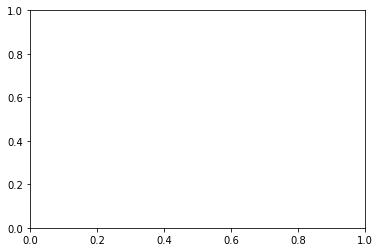

In [0]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.hist(genre_tracks[:,])
plt.show()

> Answer:  <img src="https://github.com/jigsawlabs-student/matplotlib/blob/master/hist-multi.png?raw=1" width="50%">

> This is a plot of just seven of the fourteen genres.

### Summary

In this lesson, we got practice styling different plots.  We saw how we can add legends to label our different plots.  We also saw how to changes the ranges on our x and y axis of a plot.  Then we also saw how to change the markers and colors of a plot.